In [1]:
# Our primary dataset can be found at:
# https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies
# The file is over 500MB - too big for github!

In [1]:
# import dependencies
import pandas as pd
import requests
import os
from dotenv import load_dotenv
import json
import subprocess
import matplotlib as plt

In [2]:
# Read the csv and store as a dataframe
tmdb_full_df = pd.read_csv("D://tmdb_database/TMDB_movie_dataset_v11.csv")

# tmdb_full_df.head()
tmdb_full_df.dtypes
# print(tmdb_full_df.columns.unique())

id                        int64
title                    object
vote_average            float64
vote_count                int64
status                   object
release_date             object
revenue                   int64
runtime                   int64
adult                      bool
backdrop_path            object
budget                    int64
homepage                 object
imdb_id                  object
original_language        object
original_title           object
overview                 object
popularity              float64
poster_path              object
tagline                  object
genres                   object
production_companies     object
production_countries     object
spoken_languages         object
keywords                 object
dtype: object

In [3]:
# Select the columns required
tmdb_df = tmdb_full_df[['vote_average',
                        'vote_count',
                        'release_date',
                        'revenue',
                        'runtime',
                        'budget',
                        'imdb_id',
                        #'overview',
                        'popularity',
                        #'tagline',
                        'genres',
                        #'production_companies',
                        #'spoken_languages',
                        'keywords']]
tmdb_df.shape

(1144627, 10)

In [4]:
tmdb_df = tmdb_df.dropna()
tmdb_df.shape

(184524, 10)

In [5]:
# Initial cleanup to reduce dataframe size for github.

# Convert "release_date" to datetime
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'])

# Sort for our target timeframe
start_time = '2013-01-01'
end_time = '2023-12-31'

tmdb_df = tmdb_df[(tmdb_df['release_date'] >= start_time) & (tmdb_df['release_date'] <= end_time)]
tmdb_df.shape



(64432, 10)

In [6]:
# Saving data to .csv
tmdb_df.to_csv('tmdb_df.csv')

Analysis


In [3]:
# import dependencies if needed
import pandas as pd
from dotenv import load_dotenv
import json
import subprocess
import matplotlib as plt

In [4]:
# Retrieve data from .csv
tmdb_df = pd.read_csv('tmdb_df.csv')

# Convert "release_date" to datetime
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'])

# Verify datatyps
tmdb_df.dtypes

Unnamed: 0               int64
vote_average           float64
vote_count               int64
release_date    datetime64[ns]
revenue                  int64
runtime                  int64
budget                   int64
imdb_id                 object
popularity             float64
genres                  object
keywords                object
dtype: object

In [5]:
# Create a year column
tmdb_df['year'] = tmdb_df['release_date'].dt.year

In [6]:
# Split the genre strings into lists for manipulation
tmdb_df['genres'] = tmdb_df['genres'].str.split(', ')
tmdb_df.head()

,Unnamed: 0,vote_average,vote_count,release_date,revenue,runtime,budget,imdb_id,popularity,genres,keywords,year
0,1,8.417,32571,2014-11-05,701729206,169,165000000,tt0816692,140.241,"[Adventure, Drama, Science Fiction]","rescue, future, spacecraft, race against time,...",2014
1,5,7.606,28894,2016-02-09,783100000,108,58000000,tt1431045,72.735,"[Action, Adventure, Comedy]","superhero, anti hero, mercenary, based on comi...",2016
2,6,8.255,27713,2018-04-25,2052415039,149,300000000,tt4154756,154.340,"[Adventure, Action, Science Fiction]","sacrifice, magic, superhero, based on comic, s...",2018
3,8,7.906,26638,2014-07-30,772776600,121,170000000,tt2015381,33.255,"[Action, Science Fiction, Adventure]","spacecraft, based on comic, space, orphan, adv...",2014
4,15,8.263,23857,2019-04-24,2800000000,181,356000000,tt4154796,91.756,"[Adventure, Science Fiction, Action]","superhero, time travel, space travel, time mac...",2019


In [6]:
# # Flatten the lists in the 'genres' column
# all_genres = [genre for sublist in tmdb_df['genres'] for genre in sublist]

# # Get unique values
# unique_genres = set(all_genres)

# # Display the unique values
# unique_genres

################################################################################

# # Build a list of tuples that assigns a value to each genre
# # By using tuples the values are immutable
# genre_map = [
#     ('Action', 1),
#     ('Adventure', 2),
#     ('Animation', 3),
#     ('Comedy', 4),
#     ('Crime', 5),
#     ('Documentary', 6),
#     ('Drama', 7),
#     ('Family', 8),
#     ('Fantasy', 9),
#     ('History', 10),
#     ('Horror', 11),
#     ('Music', 12),
#     ('Mystery', 13),
#     ('Romance', 14),
#     ('Science Fiction', 15),
#     ('TV Movie', 16),
#     ('Thriller', 17),
#     ('War', 18),
#     ('Western', 19),
# ]

# Use comprehensions and lamdba to convert genres to their corresponding values

# tmdb_df['genres'] = tmdb_df['genres'].apply(lambda genres: [value for genre in genres for key, value in genre_map if genre == key])

# Display the result
# print(tmdb_df['genres'].head())



In [7]:
# Create dataframe to analyze genres over time
genre_df = tmdb_df.explode('genres')
genre_df.head()


,Unnamed: 0,vote_average,vote_count,release_date,revenue,runtime,budget,imdb_id,popularity,genres,keywords,year
0,1,8.417,32571,2014-11-05,701729206,169,165000000,tt0816692,140.241,Adventure,"rescue, future, spacecraft, race against time,...",2014
0,1,8.417,32571,2014-11-05,701729206,169,165000000,tt0816692,140.241,Drama,"rescue, future, spacecraft, race against time,...",2014
0,1,8.417,32571,2014-11-05,701729206,169,165000000,tt0816692,140.241,Science Fiction,"rescue, future, spacecraft, race against time,...",2014
1,5,7.606,28894,2016-02-09,783100000,108,58000000,tt1431045,72.735,Action,"superhero, anti hero, mercenary, based on comi...",2016
1,5,7.606,28894,2016-02-09,783100000,108,58000000,tt1431045,72.735,Adventure,"superhero, anti hero, mercenary, based on comi...",2016


In [8]:
# group data
plot_1_df = genre_df.groupby(['year', 'genres'])['revenue'].sum().unstack(fill_value=0)



In [9]:
plot_1_df.head()

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
year,,,,,,,,,,,,,,,,,,,
2013,13621265820,11595759664,5803043696,7622730224,4192897079,35966569,7619220719,6380594805,6711113876,803787314,2070532986,141307392,523969140,1671327880,7250613037,7600000,6433437790,435425176,260502115
2014,15970470441,14340570808,3701450757,8965069594,2220801078,43124762,8335767584,5574697930,5044164825,812186628,1378492522,307675334,1320089676,2799353969,8823194883,0,5710135917,2033018053,91216817
2015,15224393359,16554982860,4757390335,9209690946,3243644225,38531863,8278844038,5597220951,3804297138,1174596520,980940154,717037951,1102720878,2559703101,10017686056,0,8139291500,75675249,688939714
2016,15048534876,18697455148,6973373971,12308617332,2114164210,45369294,8213216831,9418107569,8666735863,1418568998,2064405200,1493911281,2281652236,3382046568,5873211569,424665,4254934037,817339223,201279959
2017,18371837247,14528486738,4687225557,9056387652,3531260436,40646632,9621149664,6589582139,8548606411,1215131026,2972470753,1202576256,1882805760,2474173121,8053434341,2775228,4683043787,2091302154,37152930


TypeError: 'module' object is not callable

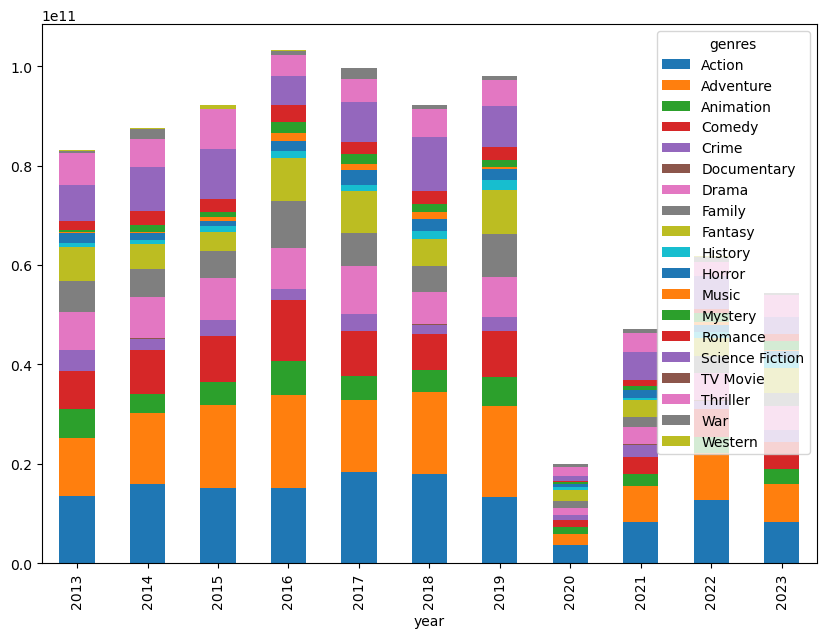

In [10]:
# show the revenue by year and genre

# Plot a stacked bar plot
plot_1_df.plot(kind='bar', stacked=True, figsize=(10, 7))
# plt.title('Revenue by Year and Genre')
# plt.xlabel('Year')
# plt.ylabel('Revenue')
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

AttributeError: module 'matplotlib' has no attribute 'title'

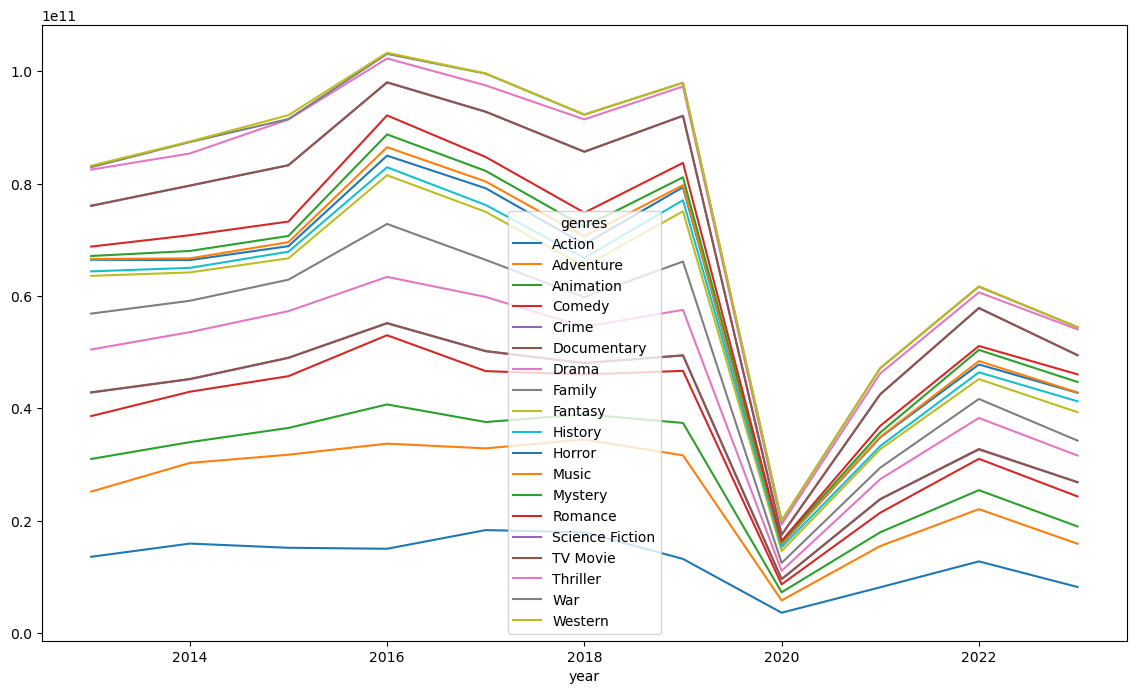

In [11]:
plot_1_df.plot(kind='line', stacked=True, figsize=(14, 8))
plt.title('Revenue by Year and Genre')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

TypeError: 'module' object is not callable

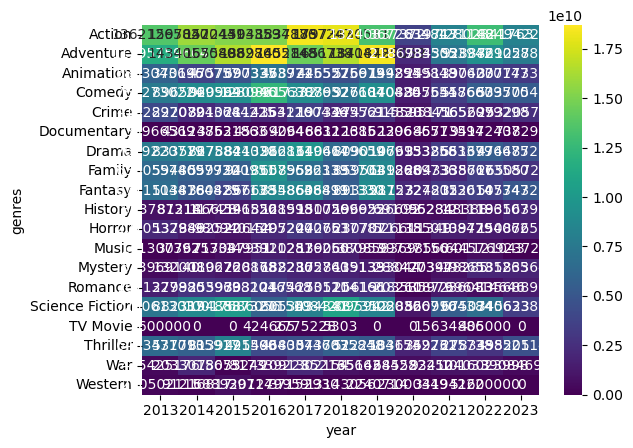

In [13]:
import seaborn as sns

# Plot the heatmap
sns.heatmap(plot_1_df.T, cmap='viridis', annot=True, fmt='.0f')
plt.figure(figsize=(14, 8))
plt.title('Revenue by Year and Genre')
plt.xlabel('Year')
plt.ylabel('Genres')
plt.tight_layout()
plt.show()

In [14]:
# Prep data for an analyis for Return on Investment

# Create Dataframe
roi_df = genre_df

tmdb_df['roi'] = round((tmdb_df['revenue'] / tmdb_df['budget']), 2)
tmdb_df.head()




,Unnamed: 0,vote_average,vote_count,release_date,revenue,runtime,budget,imdb_id,popularity,genres,keywords,year,roi
0,1,8.417,32571,2014-11-05,701729206,169,165000000,tt0816692,140.241,"[Adventure, Drama, Science Fiction]","rescue, future, spacecraft, race against time,...",2014,4.25
1,5,7.606,28894,2016-02-09,783100000,108,58000000,tt1431045,72.735,"[Action, Adventure, Comedy]","superhero, anti hero, mercenary, based on comi...",2016,13.50
2,6,8.255,27713,2018-04-25,2052415039,149,300000000,tt4154756,154.340,"[Adventure, Action, Science Fiction]","sacrifice, magic, superhero, based on comic, s...",2018,6.84
3,8,7.906,26638,2014-07-30,772776600,121,170000000,tt2015381,33.255,"[Action, Science Fiction, Adventure]","spacecraft, based on comic, space, orphan, adv...",2014,4.55
4,15,8.263,23857,2019-04-24,2800000000,181,356000000,tt4154796,91.756,"[Adventure, Science Fiction, Action]","superhero, time travel, space travel, time mac...",2019,7.87


In [16]:
# # Average ROI by genre in a given year
# roi_df = tmdb_df[tmdb_df['year']==2018.0]
# roi_df = tmdb_df.groupby(['year', 'genres'])['roi'].mean()
# roi_df.plot()


roi_df.head()

,Unnamed: 0,vote_average,vote_count,release_date,revenue,runtime,budget,imdb_id,popularity,genres,keywords,year,roi
2,6,8.255,27713,2018-04-25,2052415039,149,300000000,tt4154756,154.340,"[Adventure, Action, Science Fiction]","sacrifice, magic, superhero, based on comic, s...",2018,6.84
10,27,7.390,21053,2018-02-13,1349926083,135,200000000,tt1825683,43.665,"[Action, Adventure, Science Fiction]","africa, superhero, based on comic, aftercredit...",2018,6.75
37,85,7.492,16324,2018-05-10,785896609,120,110000000,tt5463162,66.096,"[Action, Comedy, Adventure]","hero, superhero, mutant, mercenary, based on c...",2018,7.14
41,92,7.997,15965,2018-10-24,903992901,135,52000000,tt1727824,37.550,"[Music, Drama, History]","london, england, aids, musician, 1970s, queen,...",2018,17.38
53,113,6.826,14724,2018-09-28,856085151,112,116000000,tt1270797,48.649,"[Science Fiction, Action]","spacecraft, san francisco, california, superhe...",2018,7.38


In [19]:
# Create a scatter plot

plt.scatter(roi_df['roi'], roi_df['popularity'], label='Action', color='b')
# plt.scatter(df['year'], df['Drama'], label='Drama', color='r')
plt.figure(figsize=(10, 6))
# Define the axes
plt.xlabel('popularity')
plt.ylabel('roi')
plt.title('Comparison of Popularity & RoI')
plt.legend()
plt.tight_layout()
plt.show()

AttributeError: module 'matplotlib' has no attribute 'scatter'

In [ ]:
# IN PROGRESS
# finding revenue sum by year
# Initialize a dictionary to hold the revenue sums for each genre
genre_revenue = {}

# Function to update genre revenue
def update_genre_revenue(row):
    revenue = row['revenue']
    for genre in row['genres']:
        if genre in genre_revenue:
            genre_revenue[genre] += revenue
        else:
            genre_revenue[genre] = revenue

# Apply the function to each row
sliced_df.apply(update_genre_revenue, axis=1)

# Convert the dictionary to a DataFrame for better readability
revenue_by_genre = pd.DataFrame(list(genre_revenue.items()), columns=['Genre', 'Revenue'])

# Display the result

revenue_df = pd.DataFrame(revenue_by_genre)

revenue_df.sort_values

In [ ]:
# filtered_df = tmdb_df[tmdb_df['genres'].apply(lambda x: 1 in x)]
# filtered_df = filtered_df.dropna()

# action_revenue = filtered_df['revenue'].sum()
# display(action_revenue)
# display(filtered_df.head())

In [ ]:
# result_df.plot(result_df[result_df['year']=='2014.0'])
year_df = sliced_df[sliced_df['year']==2018.0]
result_df = year_df.groupby(['year', 'genres'])['revenue'].sum()
result_df.plot(kind='bar')

